In [51]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '557010a0-bc4c-45a9-8ff2-0cd6552c56e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
 
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data


{'status': {'timestamp': '2023-11-28T03:51:54.032Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8843}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10573, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [44]:
#%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=10000000

In [52]:
type(data)

dict

In [53]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-11-28T03:51:54.032Z,0,None,21,1,None,8843


In [55]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10573,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.955489e+07,1.955489e+07,False,NaN,1,NaN,NaN,None,2023-11-28T03:51:00.000Z,37118.806167,1.861582e+10,26.2085,-0.197616,-0.465854,-1.058378,9.172635,37.724108,35.462519,7.258541e+11,51.5944,7.794949e+11,None,2023-11-28T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
1,1027,Ethereum,ETH,ethereum,7889,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202438e+08,1.202438e+08,True,NaN,2,NaN,NaN,None,2023-11-28T03:51:00.000Z,2025.097116,1.025837e+10,20.0960,-0.112125,-1.136775,0.244385,14.023200,22.673620,17.810298,2.435054e+11,17.3116,2.435054e+11,None,2023-11-28T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
2,825,Tether USDt,USDT,tether,66732,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.889888e+10,9.260995e+10,True,NaN,3,NaN,NaN,None,2023-11-28T03:50:00.000Z,1.000186,3.758119e+10,17.1638,0.001574,-0.005761,-0.049210,-0.008289,0.020457,0.031523,8.891538e+10,6.3213,9.262715e+10,None,2023-11-28T03:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-28 03:52:34.823645
3,1839,BNB,BNB,bnb,1792,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516992e+08,1.516992e+08,False,NaN,4,NaN,NaN,None,2023-11-28T03:50:00.000Z,226.713550,7.792007e+08,25.3727,-0.155099,-1.026176,-13.673156,0.822086,5.558771,0.669156,3.439227e+10,2.4444,3.439227e+10,None,2023-11-28T03:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
4,52,XRP,XRP,xrp,1153,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.381698e+10,9.998820e+10,False,NaN,5,NaN,NaN,None,2023-11-28T03:51:00.000Z,0.603917,1.100891e+09,-11.5512,-0.051877,-0.828253,-1.572061,11.123097,18.316060,13.157149,3.250096e+10,2.3106,6.039166e+10,None,2023-11-28T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
5,3408,USDC,USDC,usd-coin,15146,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.444412e+10,2.444412e+10,False,NaN,6,NaN,NaN,None,2023-11-28T03:50:00.000Z,1.000133,4.671906e+09,43.9682,-0.000926,0.025924,0.021422,0.004738,0.003977,0.020695,2.444737e+10,1.7376,2.444737e+10,None,2023-11-28T03:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-28 03:52:34.823645
6,5426,Solana,SOL,solana,554,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.234353e+08,5.635005e+08,True,NaN,7,NaN,NaN,None,2023-11-28T03:50:00.000Z,54.832879,1.216126e+09,34.2487,-0.386623,-2.711005,-2.052506,72.900750,171.811837,153.614662,2.321817e+10,1.6504,3.089835e+10,None,2023-11-28T03:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
7,2010,Cardano,ADA,cardano,983,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.529823e+10,3.639527e+10,False,NaN,8,NaN,NaN,None,2023-11-28T03:50:00.000Z,0.376817,2.498934e+08,3.5049,-0.453296,-1.693964,-2.005920,29.723408,50.399871,41.050453,1.330096e+10,0.9456,1.695674e+10,None,2023-11-28T03:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 03:52:34.823645
8,74,Dogecoin,DOGE,dogecoin,830,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '557010a0-bc4c-45a9-8ff2-0cd6552c56e5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/API.csv'):
        df.to_csv('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/API.csv', header = 'column_names')
    else:
        df.to_csv('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/API.csv', mode = 'a', header = False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully.')
    sleep(60) #sleep for 1 minute
exit()

In [65]:
df = pd.read_csv('/Users/TophMan/Documents/Data Analysis Tutorial/csv files/API.csv')

In [66]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10573,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.955499e+07,1.955499e+07,False,NaN,1,NaN,NaN,NaN,2023-11-28T04:19:00.000Z,37138.668259,1.857061e+10,25.3012,-0.024294,-0.410706,-0.878773,9.205620,37.809212,35.358409,7.262462e+11,51.5956,7.799120e+11,NaN,2023-11-28T04:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
1,1,1027,Ethereum,ETH,ethereum,7889,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202438e+08,1.202438e+08,True,NaN,2,NaN,NaN,NaN,2023-11-28T04:19:00.000Z,2027.564724,1.021631e+10,18.7998,0.108199,-0.837596,0.450321,14.096522,22.773091,17.905719,2.438021e+11,17.3185,2.438021e+11,NaN,2023-11-28T04:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
2,2,825,Tether USDt,USDT,tether,66732,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.889888e+10,9.260995e+10,True,NaN,3,NaN,NaN,NaN,2023-11-28T04:18:00.000Z,1.000073,3.755044e+10,16.6987,-0.006484,-0.025968,-0.065336,-0.016896,-0.036983,0.012727,8.890536e+10,6.3154,9.261670e+10,NaN,2023-11-28T04:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-28 04:20:42.503262
3,3,1839,BNB,BNB,bnb,1792,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516992e+08,1.516992e+08,False,NaN,4,NaN,NaN,NaN,2023-11-28T04:18:00.000Z,227.009953,7.790576e+08,24.4909,-0.019938,-0.884931,-14.017452,0.969989,5.697396,0.802612,3.443723e+10,2.4471,3.443723e+10,NaN,2023-11-28T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
4,4,52,XRP,XRP,xrp,1153,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.381698e+10,9.998820e+10,False,NaN,5,NaN,NaN,NaN,2023-11-28T04:19:00.000Z,0.605093,1.090397e+09,-13.5159,0.207843,-0.838940,-1.421812,11.289896,18.766979,13.459598,3.256425e+10,2.3132,6.050926e+10,NaN,2023-11-28T04:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
5,5,3408,USDC,USDC,usd-coin,15146,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.444121e+10,2.444121e+10,False,NaN,6,NaN,NaN,NaN,2023-11-28T04:18:00.000Z,1.000076,4.667220e+09,42.9417,-0.001133,0.027950,0.013075,0.000218,-0.036496,0.004578,2.444306e+10,1.7369,2.444306e+10,NaN,2023-11-28T04:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-28 04:20:42.503262
6,6,5426,Solana,SOL,solana,554,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.234352e+08,5.635004e+08,True,NaN,7,NaN,NaN,NaN,2023-11-28T04:18:00.000Z,55.207099,1.217981e+09,32.5994,0.475777,-2.798960,-1.292441,74.200065,172.889039,154.585045,2.337663e+10,1.6608,3.110922e+10,NaN,2023-11-28T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
7,7,2010,Cardano,ADA,cardano,983,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.529823e+10,3.639527e+10,False,NaN,8,NaN,NaN,NaN,2023-11-28T04:18:00.000Z,0.377506,2.491979e+08,3.3089,-0.252615,-1.877139,-1.793521,29.929960,50.644702,41.568829,1.332530e+10,0.9466,1.698778e+10,NaN,2023-11-28T04:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
8,8,74,Dogecoin,DOGE,dogecoin,830,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-ex

In [68]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10573,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19554987.00000,19554987.00000,False,nan,1,nan,nan,nan,2023-11-28T04:19:00.000Z,37138.66826,18570611110.20649,25.30120,-0.02429,-0.41071,-0.87877,9.20562,37.80921,35.35841,726246175003.04517,51.59560,779912033440.06006,nan,2023-11-28T04:19:00.000Z,nan,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
1,1,1027,Ethereum,ETH,ethereum,7889,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,120243818.69043,120243818.69043,True,nan,2,nan,nan,nan,2023-11-28T04:19:00.000Z,2027.56472,10216308153.30104,18.79980,0.10820,-0.83760,0.45032,14.09652,22.77309,17.90572,243802125047.39389,17.31850,243802125047.39001,nan,2023-11-28T04:19:00.000Z,nan,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
2,2,825,Tether USDt,USDT,tether,66732,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,88898878989.32739,92609951832.35176,True,nan,3,nan,nan,nan,2023-11-28T04:18:00.000Z,1.00007,37550438275.69089,16.69870,-0.00648,-0.02597,-0.06534,-0.01690,-0.03698,0.01273,88905360684.42110,6.31540,92616704105.02000,nan,2023-11-28T04:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-28 04:20:42.503262
3,3,1839,BNB,BNB,bnb,1792,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,151699214.43412,151699214.43412,False,nan,4,nan,nan,nan,2023-11-28T04:18:00.000Z,227.00995,779057558.40071,24.49090,-0.01994,-0.88493,-14.01745,0.96999,5.69740,0.80261,34437231499.70346,2.44710,34437231499.70000,nan,2023-11-28T04:18:00.000Z,nan,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
4,4,52,XRP,XRP,xrp,1153,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53816975568.00000,99988203685.00000,False,nan,5,nan,nan,nan,2023-11-28T04:19:00.000Z,0.60509,1090397205.11804,-13.51590,0.20784,-0.83894,-1.42181,11.28990,18.76698,13.45960,32564253933.47642,2.31320,60509260488.51000,nan,2023-11-28T04:19:00.000Z,nan,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
5,5,3408,USDC,USDC,usd-coin,15146,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",nan,24441208264.02576,24441208264.02576,False,nan,6,nan,nan,nan,2023-11-28T04:18:00.000Z,1.00008,4667220401.30243,42.94170,-0.00113,0.02795,0.01308,0.00022,-0.03650,0.00458,24443060165.65352,1.73690,24443060165.65000,nan,2023-11-28T04:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-28 04:20:42.503262
6,6,5426,Solana,SOL,solana,554,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",nan,423435161.74595,563500379.81566,True,nan,7,nan,nan,nan,2023-11-28T04:18:00.000Z,55.20710,1217980929.91118,32.59940,0.47578,-2.79896,-1.29244,74.20007,172.88904,154.58504,23376626930.15140,1.66080,31109221302.35000,nan,2023-11-28T04:18:00.000Z,nan,NaN,NaN,NaN,NaN,2023-11-28 04:20:42.503262
7,7,2010,Cardano,ADA,cardano,983,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35298229198.31300,36395268923.43600,False,nan,8,nan,nan,nan,2023-11-28T04:18:00.000Z,0.37751,249197883.14168,3.30890,-0.25261,-1.87714,-1.79352,29.92996,50.64470,41.56883,13325298933.43054,0.94660,16987777166.82000,nan,2023-11-28T04:1

In [71]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02998,-0.42247,-0.84837,9.17663,37.83625,35.37611
Ethereum,0.11127,-0.81250,0.53032,14.12117,22.83675,17.95808
Tether USDt,-0.01064,-0.02367,-0.06053,-0.01449,-0.03545,0.01202
BNB,-0.03236,-0.90905,-13.93760,0.89296,5.68290,0.76337
XRP,0.22681,-0.79314,-1.38375,11.30366,18.77724,13.53209
USDC,-0.01151,0.01504,0.01298,-0.00519,-0.05036,-0.00269
Solana,0.52629,-2.87200,-1.30811,73.94876,173.00293,154.54860
Cardano,-0.15961,-1.82689,-1.74746,29.90980,50.74493,41.59300
Dogecoin,0.21765,0.07494,1.66412,14.70690,27.33035,19.48375


In [73]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.02998
             quote.USD.percent_change_24h    -0.42247
             quote.USD.percent_change_7d     -0.84837
             quote.USD.percent_change_30d     9.17663
             quote.USD.percent_change_60d    37.83625
             quote.USD.percent_change_90d    35.37611
Ethereum     quote.USD.percent_change_1h      0.11127
             quote.USD.percent_change_24h    -0.81250
             quote.USD.percent_change_7d      0.53032
             quote.USD.percent_change_30d    14.12117
             quote.USD.percent_change_60d    22.83675
             quote.USD.percent_change_90d    17.95808
Tether USDt  quote.USD.percent_change_1h     -0.01064
             quote.USD.percent_change_24h    -0.02367
             quote.USD.percent_change_7d     -0.06053
             quote.USD.percent_change_30d    -0.01449
             quote.USD.percent_change_60d    -0.03545
             quote.USD.percent_change_90

In [74]:
type(df4)

pandas.core.series.Series

In [75]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.02998
            quote.USD.percent_change_24h  -0.42247
            quote.USD.percent_change_7d   -0.84837
            quote.USD.percent_change_30d   9.17663
            quote.USD.percent_change_60d  37.83625
            quote.USD.percent_change_90d  35.37611
Ethereum    quote.USD.percent_change_1h    0.11127
            quote.USD.percent_change_24h  -0.81250
            quote.USD.percent_change_7d    0.53032
            quote.USD.percent_change_30d  14.12117
            quote.USD.percent_change_60d  22.83675
            quote.USD.percent_change_90d  17.95808
Tether USDt quote.USD.percent_change_1h   -0.01064
            quote.USD.percent_change_24h  -0.02367
            quote.USD.percent_change_7d   -0.06053
            quote.USD.percent_change_30d  -0.01449
            quote.USD.percent_change_60d  -0.03545
            quote.USD.percent_change_90d   0.01202
BNB         quote.USD.percent_change_1h   -0.03236
            quote.USD.percent_change_24h  -0.90905
            quote.USD.percent_change_7d  -13.93760
            quote.USD.percent_change_30d   0.89296
            quote.USD.percent_change_60d   5.68290
            quote.USD.percent_change_90d   0.76337
XRP         quote.USD.percent_change_1h    0.22681
            quote.USD.percent_change_24h  -0.79314
            quote.USD.percent_change_7d   -1.38375
            quote.USD.percent_change_30d  11.30366
            quote.USD.percent_change_60d  18.77724
            quote.USD.percent_change_90d  13.53209
USDC        quote.USD.percent_change_1h   -0.01151
            quote.USD.percent_change_24h   0.01504
            quote.USD.percent_change_7d    0.01298
            quote.USD.percent_change_30d  -0.00519
            quote.USD.percent_change_60d  -0.05036
            quote.USD.percent_change_90d  -0.00269
Solana      quote.USD.percent_change_1h    0.52629
            quote.USD.percent_change_24h  -2.87200
            quote.USD.percent_change_7d   -1.30811
            quote.USD.percent_change_30d  73.94876
            quote.USD.percent_change_60d 173.00293
            quote.USD.percent_change_90d 154.54860
Cardano     quote.USD.percent_change_1h   -0.15961
            quote.USD.percent_change_24h  -1.82689
            quote.USD.percent_change_7d   -1.74746
            quote.USD.percent_change_30d  29.90980
            quote.USD.percent_change_60d  50.74493
            quote.USD.percent_change_90d  41.59300
Dogecoin    quote.USD.percent_change_1h    0.21765
            quote.USD.percent_change_24h   0.07494
            quote.USD.percent_change_7d    1.66412
            quote.USD.percent_change_30d  14.70690
            quote.USD.percent_change_60d  27.33035
            quote.USD.percent_change_90d  19.48375
TRON        quote.USD.percent_change_1h    0.52075
            quote.USD.percent_change_24h  -4.60156
            quote.USD.percent_change_7d    0.47718
            quote.USD.percent_change_30d   7.81675
            quote.USD.percent_change_60d  16.22350
            quote.USD.percent_change_90d  32.48256
Toncoin     quote.USD.percent_change_1h    0.22460
            quote.USD.percent_change_24h   3.57104
            quote.USD.percent_change_7d    4.62644
            quote.USD.percent_change_30d  19.69042
            quote.USD.percent_change_60d  10.05692
            quote.USD.percent_change_90d  45.36915
Chainlink   quote.USD.percent_change_1h   -0.35090
            quote.USD.percent_change_24h  -3.90848
            quote.USD.percent_change_7d   -1.44515
            quote.USD.percent_change_30d  30.04223
            quote.USD.percent_change_60d  82.61934
            quote.USD.percent_change_90d 132.29328
Avalanche   quote.USD.percent_change_1h    0.00710
            quote.USD.percent_change_24h  -2.07814
            quote.USD.percent_change_7d   -2.47266
            quote.USD.percent_change_30d  86.93707
            quote.USD.percent_change_60d 117.28206
            quo

In [76]:
type(df5)

pandas.core.frame.DataFrame

In [77]:
df5.count()

values    90
dtype: int64

In [81]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02998
1,Bitcoin,quote.USD.percent_change_24h,-0.42247
2,Bitcoin,quote.USD.percent_change_7d,-0.84837
3,Bitcoin,quote.USD.percent_change_30d,9.17663
4,Bitcoin,quote.USD.percent_change_60d,37.83625
5,Bitcoin,quote.USD.percent_change_90d,35.37611
6,Ethereum,quote.USD.percent_change_1h,0.11127
7,Ethereum,quote.USD.percent_change_24h,-0.81250
8,Ethereum,quote.USD.percent_change_7d,0.53032
9,Ethereum,quote.USD.percent_change_30d,14.12117


In [82]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02998
1,Bitcoin,quote.USD.percent_change_24h,-0.42247
2,Bitcoin,quote.USD.percent_change_7d,-0.84837
3,Bitcoin,quote.USD.percent_change_30d,9.17663
4,Bitcoin,quote.USD.percent_change_60d,37.83625
5,Bitcoin,quote.USD.percent_change_90d,35.37611
6,Ethereum,quote.USD.percent_change_1h,0.11127
7,Ethereum,quote.USD.percent_change_24h,-0.81250
8,Ethereum,quote.USD.percent_change_7d,0.53032
9,Ethereum,quote.USD.percent_change_30d,14.12117


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

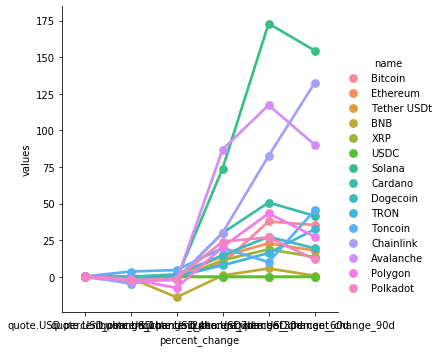

In [85]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [87]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.02998
1,Bitcoin,24h,-0.42247
2,Bitcoin,7d,-0.84837
3,Bitcoin,30d,9.17663
4,Bitcoin,60d,37.83625
5,Bitcoin,90d,35.37611
6,Ethereum,1h,0.11127
7,Ethereum,24h,-0.81250
8,Ethereum,7d,0.53032
9,Ethereum,30d,14.12117


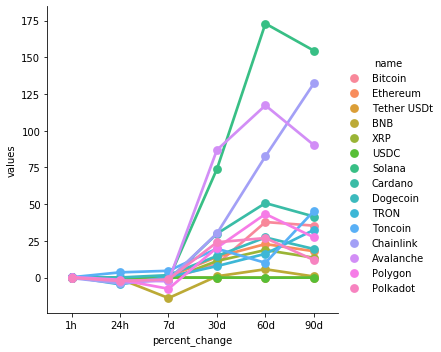

In [88]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [89]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,37138.66826,2023-11-28 04:20:42.503262
15,Bitcoin,37136.59525,2023-11-28 04:21:42.814941
30,Bitcoin,37139.08545,2023-11-28 04:22:43.027259
45,Bitcoin,37139.08545,2023-11-28 04:23:43.225485


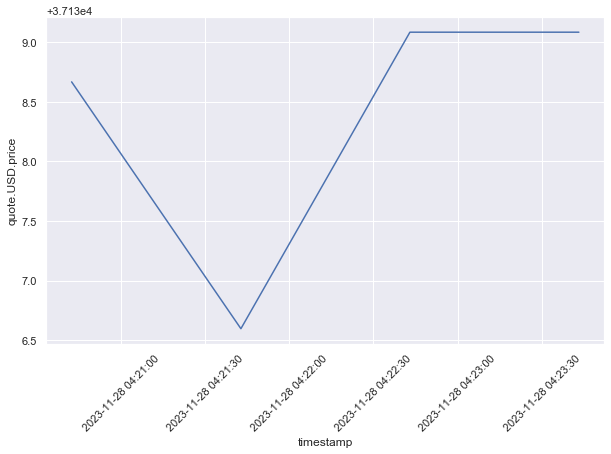

In [102]:
import matplotlib.dates as mdates

# Assuming df8 is DataFrame with timestamps
# Convert the 'timestamp' column to datetime if it's not already
df8['timestamp'] = pd.to_datetime(df8['timestamp'])

# Set the style
sns.set(style="darkgrid")

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)

# Format the x-axis timestamps
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Adjust rotation as needed

# Show the plot
plt.show()